### ATTRIBUTE INFORMATION:  
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


**Education**

1 'Below College' 

2 'College' 

3 'Bachelor' 

4 'Master' 

5 'Doctor'


**Environment Satisfaction**


1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 

**Job Involvement** 

1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 


**Job Satisfaction 
1 'Low' 
2 'Medium'
3 'High' 
4 'Very High' 


Performance Rating 
1 'Low' 
2 'Good' 
3 'Excellent' 
4 'Outstanding' 
Relationship Satisfaction 
1 'Low' 
2 'Medium' 
3 'High' 
4 'Very High' 
Work 
Life Balance 
1 'Bad' 
2 'Good' 
3 'Better' 
4 'Best' 
 

 

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

#There are 917 rows and 35 columns



(917, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#As per data description, the below features need to be converted as categorical instead of numerical:


df['Education'] = df['Education'].astype('object')

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('object')

df['JobInvolvement'] = df['JobInvolvement'].astype('object')

In [6]:
#Categorical columns

df_cat = df.select_dtypes('O')

df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [7]:
#Continous columns

df_num = df.select_dtypes(np.number)

df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
#Five point summary 

df_num.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,917.000000,917.000000,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,36.938931,785.711014,9.294438,1.0,1413.466739,66.231189,2.044711,2.688113,6452.293348,14428.468920,...,2.637950,80.0,0.821156,11.179935,2.791712,2.760087,6.972737,4.217012,2.147219,4.062159
std,8.984981,401.902148,8.092566,0.0,388.606884,20.237536,1.100400,1.110097,4685.137761,7188.332799,...,1.078673,0.0,0.864555,7.802790,1.292917,0.708047,5.951250,3.588223,3.176250,3.571395
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1051.000000,2097.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,444.000000,2.000000,1.0,1084.000000,49.000000,1.000000,2.000000,2933.000000,8018.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,772.000000,7.000000,1.0,1425.000000,66.000000,2.000000,3.000000,4877.000000,14255.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1141.000000,14.000000,1.0,1737.000000,84.000000,3.000000,4.000000,8103.000000,20763.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,1.0,2068.000000,100.000000,5.000000,4.000000,19973.000000,26997.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


In [9]:
df_cat.describe()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,MaritalStatus,Over18,OverTime
count,917,917,917,917,917,917,917,917,917,917,917,917
unique,2,3,3,5,6,4,2,4,9,3,1,2
top,No,Travel_Rarely,Research & Development,3,Life Sciences,4,Male,3,Sales Executive,Married,Y,No
freq,763,648,597,359,385,290,550,532,203,436,917,656


In [10]:
#Split of categorical observations
for i in df_cat.columns:
    print(df_cat[i].value_counts())
    print('-----------------------------')


No     763
Yes    154
Name: Attrition, dtype: int64
-----------------------------
Travel_Rarely        648
Travel_Frequently    172
Non-Travel            97
Name: BusinessTravel, dtype: int64
-----------------------------
Research & Development    597
Sales                     275
Human Resources            45
Name: Department, dtype: int64
-----------------------------
3    359
4    254
2    170
1    106
5     28
Name: Education, dtype: int64
-----------------------------
Life Sciences       385
Medical             285
Marketing            92
Technical Degree     82
Other                55
Human Resources      18
Name: EducationField, dtype: int64
-----------------------------
4    290
3    276
1    179
2    172
Name: EnvironmentSatisfaction, dtype: int64
-----------------------------
Male      550
Female    367
Name: Gender, dtype: int64
-----------------------------
3    532
2    239
4     92
1     54
Name: JobInvolvement, dtype: int64
-----------------------------
Sales Executive  

In [11]:
#Percentage of categorical observations

for i in df_cat.columns:
    print(df_cat[i].value_counts()/len(df)*100)
    print('-----------------------')
    
    

No     83.206107
Yes    16.793893
Name: Attrition, dtype: float64
-----------------------
Travel_Rarely        70.665213
Travel_Frequently    18.756816
Non-Travel           10.577972
Name: BusinessTravel, dtype: float64
-----------------------
Research & Development    65.103599
Sales                     29.989095
Human Resources            4.907306
Name: Department, dtype: float64
-----------------------
3    39.149400
4    27.699019
2    18.538713
1    11.559433
5     3.053435
Name: Education, dtype: float64
-----------------------
Life Sciences       41.984733
Medical             31.079607
Marketing           10.032715
Technical Degree     8.942203
Other                5.997819
Human Resources      1.962923
Name: EducationField, dtype: float64
-----------------------
4    31.624864
3    30.098146
1    19.520174
2    18.756816
Name: EnvironmentSatisfaction, dtype: float64
-----------------------
Male      59.97819
Female    40.02181
Name: Gender, dtype: float64
----------------------

In [12]:
df.isnull().sum()

#There are no null values in the data.


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

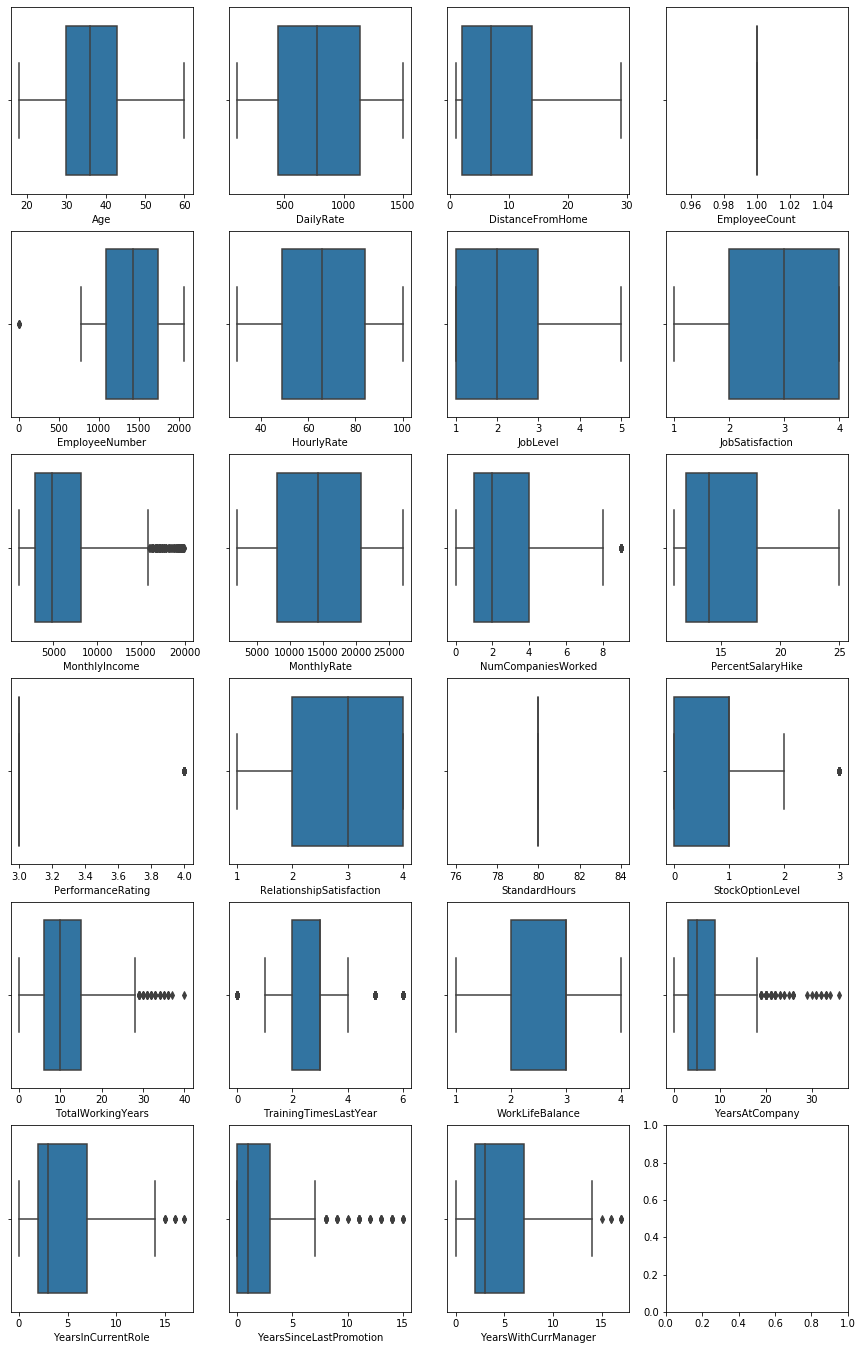

In [13]:
#check for outliers

df_num = df.select_dtypes(np.number)

fig,ax = plt.subplots(nrows = 6,ncols = 4,figsize = (15,24))

for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
    
plt.show()

In [14]:
# There are outliers present in few columns

# We shall use IQR method to treat those outliers

df_num = df.select_dtypes(np.number)

q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

iqr = q3 - q1


df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

df.shape

# The number of rows have been reduced to 488 after treating outliers using IQR


(488, 35)

In [15]:
#We can see that different numerical features are in different scales. 

#Hence, we shall use Standard scaler to convert them into the same scale 

df_cat = df.select_dtypes('O')
df_num = df.select_dtypes(np.number)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(data = ss, index = df_num.index, columns = df_num.columns)

df_num.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,4.880000e+02,4.880000e+02,4.880000e+02,488.0,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,...,4.880000e+02,488.0,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02
mean,-9.532448e-17,7.075397e-17,1.127286e-16,0.0,-5.373661e-16,1.137524e-17,7.484905e-17,1.228525e-17,1.020927e-16,-8.212920e-17,...,-6.324631e-17,0.0,-3.731077e-17,8.030917e-17,-4.795799e-16,7.280151e-18,2.036167e-17,-9.612074e-17,3.844830e-17,-5.596616e-17
std,1.001026e+00,1.001026e+00,1.001026e+00,0.0,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,...,1.001026e+00,0.0,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00,1.001026e+00
min,-2.079451e+00,-1.697791e+00,-1.052112e+00,0.0,-1.699120e+00,-1.762873e+00,-1.002412e+00,-1.489423e+00,-1.483274e+00,-1.737291e+00,...,-1.498571e+00,0.0,-9.882783e-01,-1.731841e+00,-2.029931e+00,-2.366004e+00,-1.501395e+00,-1.185331e+00,-7.211130e-01,-1.152434e+00
25%,-7.614097e-01,-8.528252e-01,-9.292232e-01,0.0,-9.024251e-01,-8.901795e-01,-1.002412e+00,-5.954029e-01,-8.127405e-01,-8.458636e-01,...,-5.821517e-01,0.0,-9.882783e-01,-7.516295e-01,-6.948819e-01,-9.848916e-01,-6.953658e-01,-5.324626e-01,-7.211130e-01,-5.015224e-01
50%,-1.622998e-01,-2.903079e-02,-1.918884e-01,0.0,5.020156e-02,3.099732e-02,3.640043e-01,2.986174e-01,-2.146416e-01,-1.236294e-02,...,3.342677e-01,0.0,4.428191e-01,3.253981e-02,-6.948819e-01,3.962208e-01,-1.580127e-01,-3.692454e-01,-2.247757e-01,-5.015224e-01
75%,5.566320e-01,8.850511e-01,6.683356e-01,0.0,8.554135e-01,8.552082e-01,3.640043e-01,1.192638e+00,5.026841e-01,8.542334e-01,...,1.250687e+00,0.0,4.428191e-01,4.246245e-01,6.401668e-01,3.962208e-01,6.480170e-01,1.099709e+00,2.715616e-01,1.125758e+00
max,2.953071e+00,1.774226e+00,2.388784e+00,0.0,1.697315e+00,1.630936e+00,3.096837e+00,1.192638e+00,4.032974e+00,1.835892e+00,...,1.250687e+00,0.0,1.873916e+00,3.757344e+00,1.975215e+00,1.777333e+00,3.334783e+00,3.384749e+00,2.753248e+00,3.078494e+00


In [16]:
#Clean df without null values, outliers and also in the same scale. 

df = pd.concat([df_cat,df_num],axis = 1)

df.isnull().sum()

Attrition                   0
BusinessTravel              0
Department                  0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
MaritalStatus               0
Over18                      0
OverTime                    0
Age                         0
DailyRate                   0
DistanceFromHome            0
EmployeeCount               0
EmployeeNumber              0
HourlyRate                  0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
#Checking imbalance of Target 


df['Attrition'].value_counts()/len(df)*100

#The target variable is highly imbalanced

# We need to perform imbalance treatment so that the model is able to predict both the classes

# We can perform Undersampling of Majority class or

# Oversampling of Minority class

# We need to make use of other metrics like roc_auc score instead of metrics like accuracy score

# We can also try Synthetic methods like SMOTE to perform imbalance treatment

No     81.557377
Yes    18.442623
Name: Attrition, dtype: float64

In [18]:
# We can drop Employee count,over 18,Performance rating,Standard hours from the data 

#since it consists of the same value throughout the data 

#and hence does help in any way during our model building or analysis

df = df.drop('EmployeeCount',axis = 1)
df = df.drop('Over18',axis = 1)
df = df.drop('PerformanceRating',axis = 1)
df = df.drop('StandardHours',axis = 1)
df.shape

(488, 31)

In [19]:
# We shall encode the target variable so that it helps with understanding correlation and model building


df['Attrition'] = pd.get_dummies(df['Attrition'],drop_first = True)



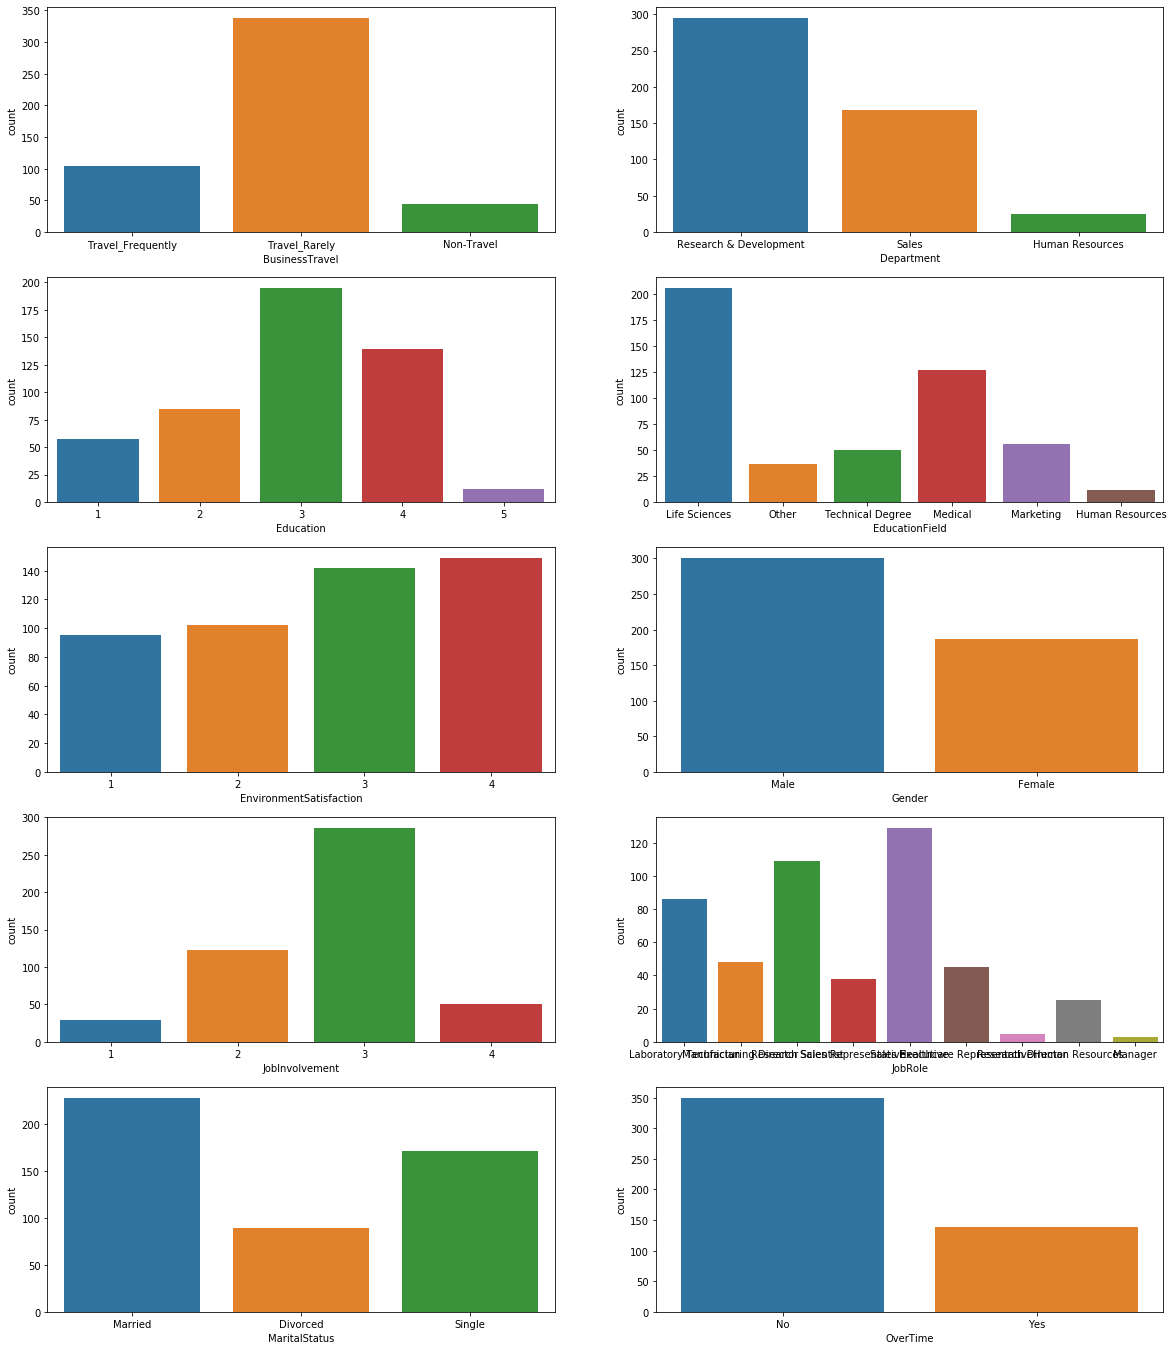

In [20]:
#Categorical plots

df_cat = df.select_dtypes('O')

fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (20,24))

for i,j in zip(df_cat.columns,ax.flatten()):
    sns.countplot(df_cat[i],ax = j)
    
plt.show()

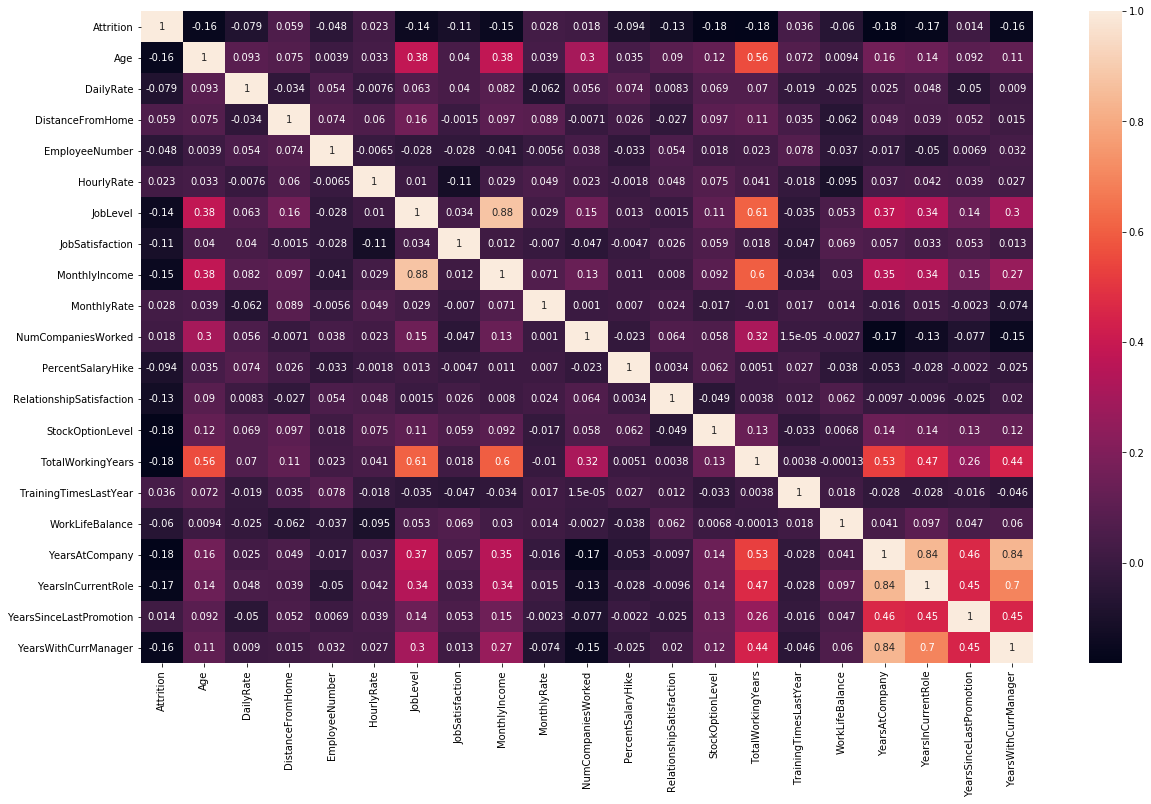

In [21]:
#Checking numerical feature's association with Target using heatmap


plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [22]:
# Independation variable's correlation with Target (Attrition)

# Yearssincelastpromotion,years in current role,years at company,total working years,monthly income
# and job level have a high positive correlation with Target

#Training times last year , percent salary hike, num companies worked, monthy rate 

# have a slight negative correlation with the target


In [23]:
# From the heatmap, we can see that there is a presence of multicollinearity within Independent variables

# We shall use variance inflation factor to identify and treat the Multicollinearity accordingly

x = df.drop('Attrition',axis = 1)

x = pd.get_dummies(x,drop_first = True)

y = df['Attrition']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif['features'] = x.columns


multi = vif.sort_values('vif_factor',ascending = False)

# We shall remove the features with more that 10 as vif_factor
multi = multi.head(6)

In [24]:
multi = multi.features.to_list()
multi

#Features with high multicollinearity

['Department_Sales',
 'JobRole_Sales Executive',
 'Department_Research & Development',
 'JobRole_Sales Representative',
 'EducationField_Life Sciences',
 'EducationField_Medical']

In [25]:
# Independent features after removing multicollinearity

x = x.drop(multi,axis = 1)



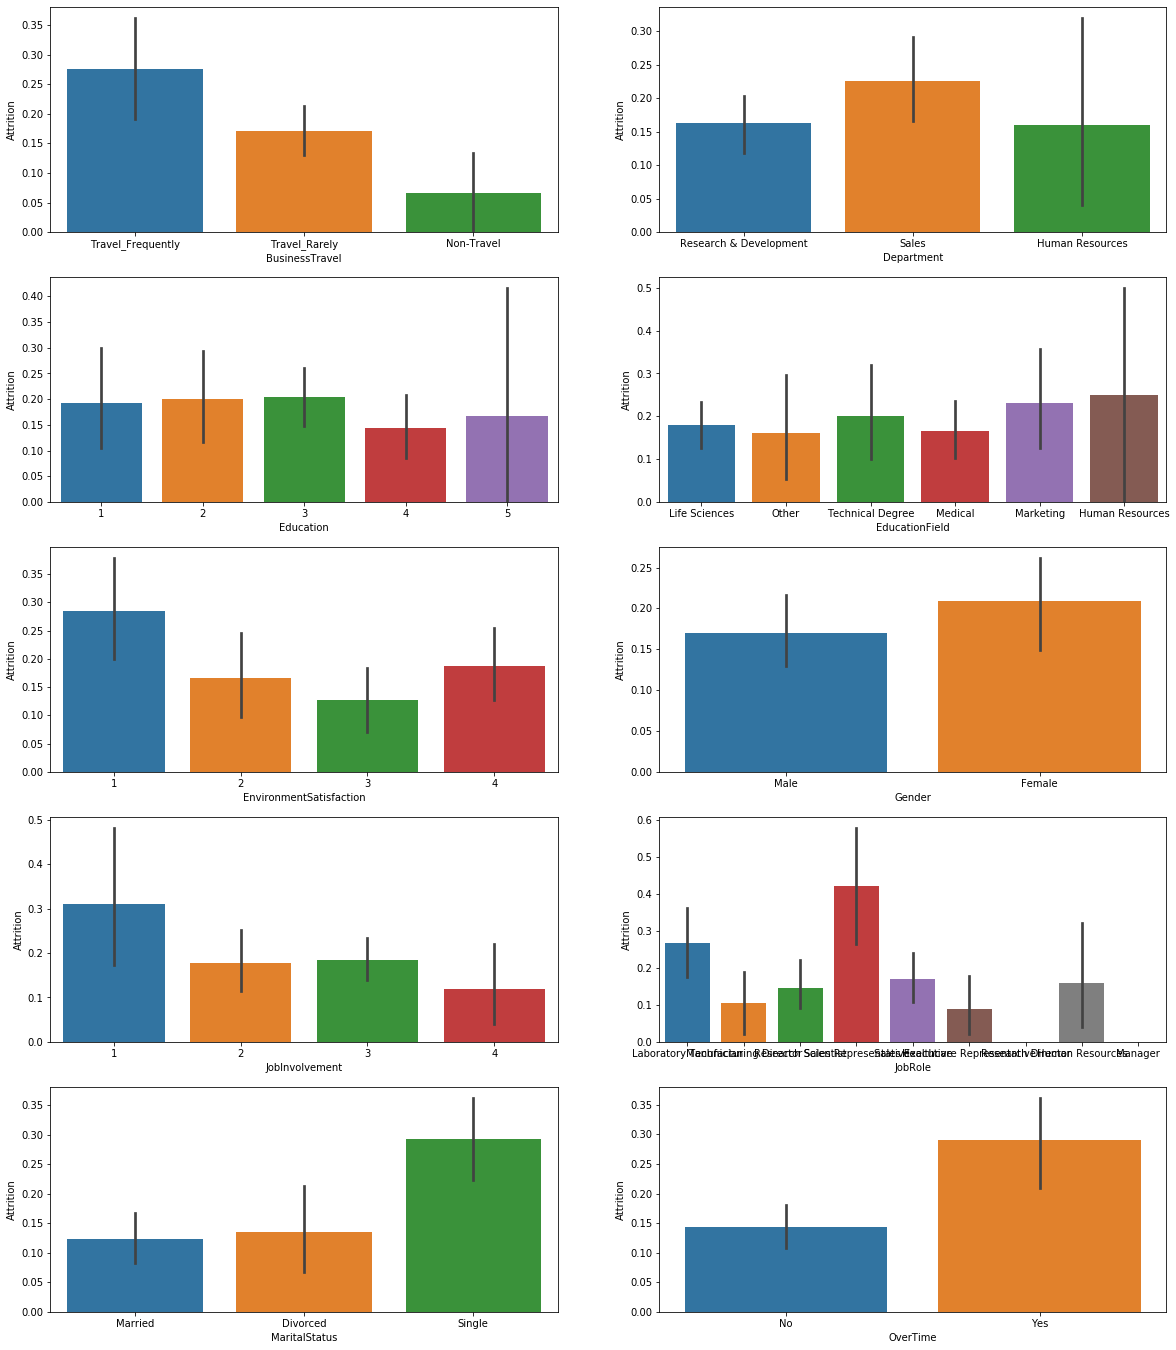

In [26]:
#Plotting independent variables associated with target

#Categorical plots with Target

df_cat = df.select_dtypes('O')

fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (20,24))

for i,j in zip(df_cat.columns,ax.flatten()):
   
    sns.barplot(x = df_cat[i],y = df['Attrition'],ax = j)
    
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)



In [30]:
#h0 : The train and test data represent the overall data
#h1 : The train and test data do not represent the overall data

#Consider alpha = 0.05

from scipy.stats import ttest_ind

ttest_ind(y_train,y_test)


Ttest_indResult(statistic=-0.9884433739859364, pvalue=0.32342739836144485)

In [31]:
ttest_ind(x_train,x_test)

Ttest_indResult(statistic=array([-0.70693029,  0.6630499 , -1.66809844, -0.38207001,  1.27204321,
        1.32633182,  0.69574551,  0.91656778,  0.49061391, -1.70966974,
        0.19417625,  1.93676586, -0.20935784,  0.22393804,  0.19880787,
        0.52070226, -0.09384113, -0.10354178,  0.66357612,  0.78641628,
       -0.80825022,  0.81480636, -0.62216803, -0.65568213,  1.28298332,
       -0.8814176 , -0.34949425,  1.17169361, -0.6296924 ,  0.90291397,
       -0.91677745, -0.45266941, -0.6747376 ,  0.46527967, -0.76981042,
        0.34470141,  0.68399246,  0.23408133,  1.13990634,  0.15177269,
        0.49502841, -0.98587224, -0.26046199,  0.51821578,  1.21961218]), pvalue=array([0.47994861, 0.50761295, 0.0959403 , 0.70257644, 0.20396608,
       0.18535275, 0.48692078, 0.35982376, 0.62392098, 0.08796527,
       0.84611902, 0.05335323, 0.83425663, 0.82289962, 0.84249618,
       0.60281134, 0.92527403, 0.91757571, 0.50727629, 0.43200693,
       0.419342  , 0.41558225, 0.53412316, 0.5123

In [32]:
#Since the p-value is greater than alpha, we accept the null hypothesis

# The train and test data represent the overall data


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(random_state = 1)

model = dtc.fit(x_train,y_train)


In [36]:
#A) Overall accuracy and inference


print('The train accuracy is ',model.score(x_train,y_train))
print('The test accuracy is ',model.score(x_test,y_test))


The train accuracy is  1.0
The test accuracy is  0.7278911564625851


In [37]:
#We can see that accuracy for train data is 100%

# However, it is not a good accuracy score since the accuracy can never be perfect for train/test data

# This basically means that the model is capturing unwanted noise along with the data

# Or in other words, there is severe overfitting present in the base model



In [38]:
#b) Precision Recall and F1 score with Explanation 

from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.81      0.85      0.83       116
           1       0.32      0.26      0.29        31

    accuracy                           0.73       147
   macro avg       0.57      0.56      0.56       147
weighted avg       0.71      0.73      0.72       147



In [ ]:
# Inference

# Considering our problem statement,Here 1 refers to an employee leaving the company

# and 0 refers to an employee who is retained/has not left the company

#Precision: 

# Precision basically tells you how many are correctly classified within a clas (1 or 0)

# We can see that there are very less correclty classified for predicting an employee to leave the company and high for retaining an employee

#Recall:

# Recall tells you how many of this class we have found over the whole number of elements in the individual class

# Similar to precision, we have found more for Retained class and less for Attrition class (Yes/1)

# F1 score:

# F1 score is the harmonic mean of Precision and recall

# We can clearly see that the model is not able to predict the minorty class well



In [42]:
#c) Significant variables

# We shall use feature importance to find the important/signficant features of the base model

fe = pd.DataFrame()

fe['features'] = x.columns

fe['score'] = model.feature_importances_

top_feat = fe.sort_values('score',ascending = False)

signi_list = top_feat.features.head().to_list()

signi_list
#These are the most significant features in our base model

['Age', 'OverTime_Yes', 'HourlyRate', 'PercentSalaryHike', 'YearsAtCompany']

In [43]:
#d) Cohen Kappa score and inference

from sklearn.metrics import cohen_kappa_score

print(cohen_kappa_score(y_test,y_pred))

0.12002394492666868


In [ ]:
#Inference

# Cohen kappa is a stastical measure that is used to measure the reliability of two attributes (in this case,y_pred and y_test)

# who are rating the same quantity and identified how frequently both the values

# are in agreement


# The scores range from -1 to 1 and if the score is nearer to 1, it is a good agreement

# The score that we have got is nearer to 0 (no agreement) and hence it is not a very good score




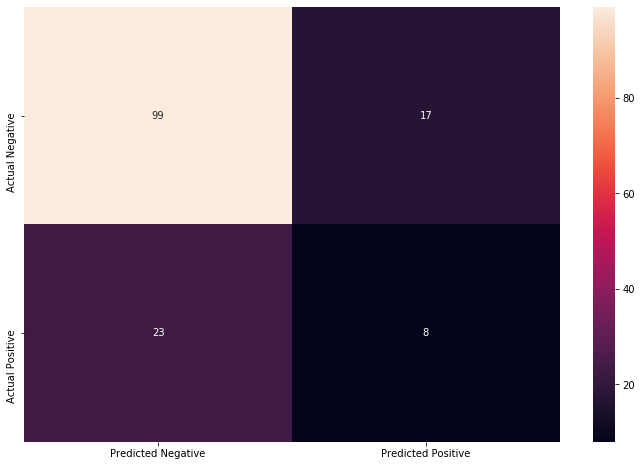

In [46]:
#Other key model output parameters:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

conf = pd.DataFrame(data = cm, columns = ['Predicted Negative','Predicted Positive'],index = ['Actual Negative','Actual Positive'])

plt.figure(figsize = (12,8))
sns.heatmap(conf,annot = True , fmt = 'g')
plt.show()


In [ ]:
#Inference 

#We can see that true positives are very less when compared to True Negatives 

#False negative is greater than False positive



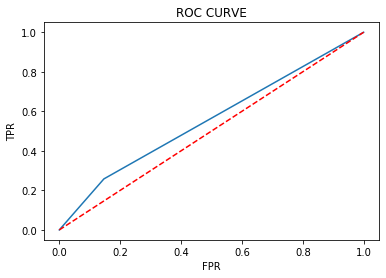

In [47]:
#ROC-AUC CURVE 

from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,th = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,label = 'Decision Tree Classifier')

plt.plot([0,1],[0,1],'r--')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.title('ROC CURVE')

plt.show()




In [ ]:
# We can see that the area under the curve is very less and hence this is not a good model


In [48]:
#ROC AUC SCORE

print(roc_auc_score(y_test,y_pred))

# The ROC AUC score is 0.55 which is very moderate. This score needs to be improved further


0.5557563959955505


In [52]:
#We shall use Recursive feature Elimination to get the best features of the model

from sklearn.feature_selection import RFE

dtc = DecisionTreeClassifier(random_state = 1)

rfe_model = RFE(estimator = dtc,n_features_to_select = 10)

rfe_model = rfe_model.fit(x_train,y_train) 

df_rfe = pd.DataFrame()

df_rfe['features'] = x.columns

df_rfe['ranking'] = rfe_model.ranking_

top = df_rfe[df_rfe['ranking']==1]
top = top.features.to_list()

top

['Age',
 'DailyRate',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyRate',
 'PercentSalaryHike',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'JobRole_Research Scientist',
 'OverTime_Yes']

In [55]:
# We have selected only the top 10 features using RFE for our next model 

#Train test split

x_top = x[top]

x_train,x_test,y_train,y_test = train_test_split(x_top,y,test_size = 0.3)

model_top = dtc.fit(x_train,y_train)

In [56]:
print('The train accuracy is ',model_top.score(x_train,y_train))
print('The test accuracy is ',model_top.score(x_test,y_test))

# We can see that still overfitting is present as train accuracy is 100%

The train accuracy is  1.0
The test accuracy is  0.7210884353741497


In [60]:
# We shall use Grid search to optimize the parameters and yield a better result

from sklearn.model_selection import GridSearchCV

tuned_params = [{'criterion':['gini','entropy'],'max_depth': range(2,10), 'min_samples_split': range(2,10)}]

grid = GridSearchCV(estimator = dtc,param_grid = tuned_params,cv = 5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [61]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9}

In [62]:
dtc_tuned = DecisionTreeClassifier(random_state = 1, criterion = 'gini',max_depth = 5, min_samples_split = 9)

model_final = dtc_tuned.fit(x_train,y_train)

In [63]:
print('The train accuracy is ',model_final.score(x_train,y_train))
print('The test accuracy is ',model_final.score(x_test,y_test))

The train accuracy is  0.8856304985337243
The test accuracy is  0.8503401360544217


In [ ]:
# We can see that the train accuracy is 88% and test accuracy is 85% which is almost equal

# Hence overfitting has been handled and we now have a good final model

In [ ]:
# Overall fit of the model and measures to prove it is a good model


# Using accuracy as a metric, We can see that the train accuracy is 88% and test accuracy is 85% which is almost equal

# Hence overfitting has been handled and the model has an accuracy higher than 80% in the test/unseen data



In [65]:
# We shall print the classification report for metrics like precision, recall and f1 score

y_pred = model_final.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       122
           1       0.64      0.28      0.39        25

    accuracy                           0.85       147
   macro avg       0.75      0.62      0.65       147
weighted avg       0.83      0.85      0.83       147



In [ ]:
# We can see that when compared to the base model, the precision, 

# recall and F1 score has drastically increased for the minority class



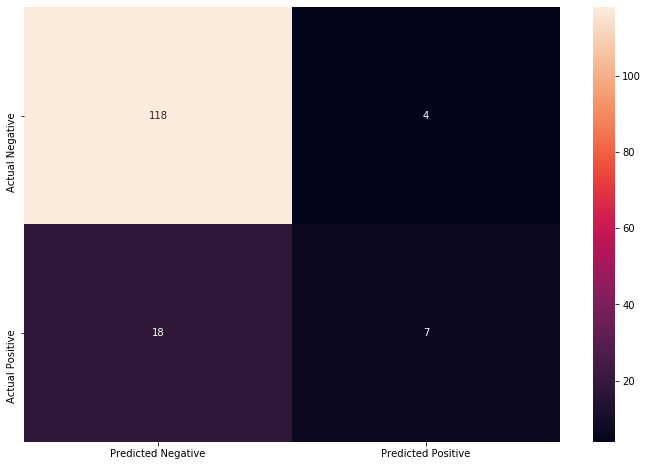

In [66]:
# We shall plot the confusion matrix for our final model

cm = confusion_matrix(y_test,y_pred)

conf = pd.DataFrame(data = cm, columns = ['Predicted Negative','Predicted Positive'],index = ['Actual Negative','Actual Positive'])

plt.figure(figsize = (12,8))
sns.heatmap(conf,annot = True , fmt = 'g')
plt.show()

# We can see that the amount of True positives are very less which is not a good sign. 

# The model is however able to predict True negatives very well 

# This usually happens when there is an imbalance in the data



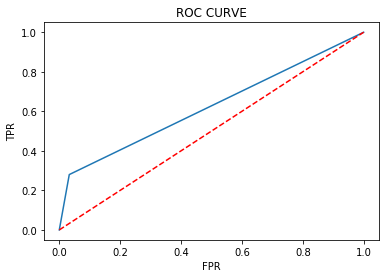

In [67]:
#ROC-AUC CURVE 

from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,th = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,label = 'Decision Tree Classifier')

plt.plot([0,1],[0,1],'r--')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.title('ROC CURVE')

plt.show()

# We can see that the area under the curve is less, however, it is increased when compared to the base model



In [68]:
#ROC AUC SCORE

print(roc_auc_score(y_test,y_pred))

# We can see that the ROC AUC Score is 0.62 and also has increased when compared to the base model 



0.6236065573770492


In [73]:

top

#The below features are the ones affecting the target the most and contirbutes to builing a good model


['Age',
 'DailyRate',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyRate',
 'PercentSalaryHike',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'JobRole_Research Scientist',
 'OverTime_Yes']

In [ ]:
# Changes from the base model that had the most impact


# When we built the base model after treating multicollinearity, we had more than 30 columns

# However, after using Recursive feature elimination, we selected the top 10 features that contribute better to the model

# This had a significant impact to the final model

# Also, used Grid Search CV to fine tune the above mentioned model and find the optimal paramters

# This helped us overcomed overfitting and hence has the most impact on the final model building process compared to the base model




In [ ]:
# Key risk to my implementation

# Though we have built a succesfull model with high accuracy and without ovefitting/underfitting,

# Our model is still unable to predict the minority class as well as it predicts the majorit class

# Majority Class=> Employee retained

# Minority Class=> Employees who left the company / Attrition = Yes

# Since our problem statment was to identify the Employee Atrrition and provide insights, 

# We need to use Imbalance treatment which would help increase the precision,recall and accuracy for the Minority class

# We can make use of SMOTE which is a synthetic method of oversampling the minority class in this case.


